In [1]:
import pandas as pd

In [2]:
import os
import sys
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
print(dir_path)
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import time
import numpy as np
import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
from lynne_pp import *
import pandas as pd
import matplotlib.pyplot as plt


/Users/josh/Documents/Harvard/GLM


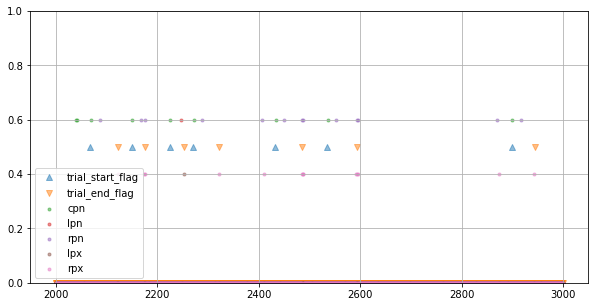

In [3]:
df = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10062021.txt')
df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
df = rename_columns(df)
df = define_trial_starts_ends(df, trial_shift_bounds=1)

lb = 2000
ub = 3000

plt.figure(figsize=(10,5))
care = df.iloc[lb:ub]
for col in ['trial_start_flag', 'trial_end_flag', 'cpn', 'lpn', 'rpn', 'lpx', 'rpx']:
    if col == 'trial_start_flag':
        marker = '^'
        mult = 0.5
    elif col == 'trial_end_flag':
        marker = 'v'
        mult = 0.5
    else:
        marker = '.'
        if col[-1] == 'n':
            mult = 0.6
        else:
            mult = 0.4
    care_filt = care#[care[col] > 0]
    plt.scatter(care_filt.index, care_filt[col]*mult, label=col, alpha=0.5, marker=marker)
plt.ylim(0,1)
plt.grid(True, which='both')
plt.legend()

In [4]:
df_t = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10062021.txt')
df_t

,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
0,0,0,0,0,0,0,1,0,0.1,0.9,0
1,0,0,0,0,0,0,1,0,0.1,0.9,0
2,0,0,0,0,0,0,1,0,0.1,0.9,0
3,0,0,0,0,0,0,1,0,0.1,0.9,0
4,0,0,0,0,0,0,1,0,0.1,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...
260,1,28386,28387,28404,28444,28408,0,1,0.1,0.9,1
261,1,28544,28545,28561,28588,28564,0,1,0.1,0.9,1
262,1,28714,28715,28729,28758,28736,0,1,0.1,0.9,1
263,1,28810,28811,28828,28864,28832,0,1,0.1,0.9,1


In [5]:
# dftmp = df.copy()
# dftmp.loc[df_t['photometrySideOutIndex'].values].drop(0)

In [6]:
# idx = 1354
# dftmp.loc[idx-10:idx+10]

In [7]:
col_lst = [
    'photometryCenterInIndex',
    'photometryCenterOutIndex',
    'photometrySideInIndex',
    'photometrySideOutIndex',
    'photometryFirstLickIndex',
    'wasRewarded'
]

In [15]:
import glob

df2 = pd.DataFrame()

data_folder = '/Users/josh/Documents/Harvard/GLM'

# GLM_SIGNALS_WT61_10062021.txt

for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt'):
    table_fn = fn.replace('GLM_SIGNALS', 'GLM_TABLE')
    print(fn, '--', table_fn)

    df_t = pd.read_csv(table_fn)

    df = pd.read_csv(fn)    
    df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
    # df = rename_columns(df)
    # df = define_trial_starts_ends(df, trial_shift_bounds=1)
    df = preprocess_lynne(df, trial_shift_bounds=1)

    # for col_val in col_lst:
    #     df[col_val] = 0
    #     df.loc[df_t[col_val].values, col_val] = 1
    
    print(df2.isna().sum().sum())

    if len(df2) == 0:
        df2 = df.copy()
    else:
        df2 = df2.append(df)

    # display(df2)
    # break

/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10152021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10152021.txt
Percent of Data in ITI: 0.500351881392512
0.0
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10042021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10042021.txt
Percent of Data in ITI: 0.5158371040723982
235
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10062021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10062021.txt
Percent of Data in ITI: 0.5177656244625598
312
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10132021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10132021.txt
Percent of Data in ITI: 0.5100021248823726
385
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10082021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10082021.txt
Percent of Data in ITI: 0.474248460702644
549
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10182021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_101820

In [16]:
df2.iloc[:,-14:]

,ft_xx,ft_lpn,ft_rpn,ft_spn,ft_lpx,ft_rpx,ft_spx,ft_cpn,ft_r_rpn,ft_r_lpn,ft_r_spn,ft_nr_rpn,ft_nr_lpn,ft_nr_spn
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import seaborn as sns
for channel in ['Ch1', 'Ch2', 'Ch5', 'Ch6']:
    plt.figure(figsize=(10,5))
    for alignment_col in ['ft_r_spn', 'ft_nr_spn']:
        relative_df = pd.DataFrame()
        rel_points = df2[df2[alignment_col] > 0].reset_index()
        print('01')
        identifiers = rel_points[['index', 'nTrial', 'nEndTrial']].dropna().values.astype(int)
        print('02')
        for idx, nTrial, nEndTrial in identifiers:
            extended_trial = df2[(df2['nTrial'] == nTrial) | (df2['nEndTrial'] == nEndTrial)].reset_index().copy()
            print('03', idx)
            extended_trial['index'] -= idx
            print('04', idx)

            if len(relative_df) == 0:
                relative_df = extended_trial.copy()
            else:
                relative_df = pd.concat([relative_df, extended_trial])
            print('05', idx)
        
        alignment_name = alignment_col.split('_')[-1]
        # sns.lineplot(x='index', y=channel, data=relative_df[relative_df['index'].between(-40, 60)], label=f'{alignment_col} — {channel}')

        print('06')
        plot_df = relative_df[relative_df['index'].between(-40, 60)].groupby('index')[channel].mean().reset_index()
        plt.plot(plot_df['index'], plot_df[channel], label=f'{alignment_col} — {channel}')

        print('07')

        plt.title(f'{alignment_name} — {channel}')
        plt.ylim(-1.5,1.5)
        plt.grid()
    plt.legend()
    plt.show()

display(relative_df)

01
02
03 1202
04 1202
05 1202
03 1346
04 1346
05 1346
03 1524
04 1524
05 1524
03 1563
04 1563
05 1563
03 1625
04 1625
05 1625
03 1662
04 1662
05 1662
03 1754
04 1754
05 1754
03 1789
04 1789
05 1789
03 1904
04 1904
05 1904
03 2045
04 2045
05 2045
03 2185
04 2185
05 2185
03 2478
04 2478
05 2478
03 2567
04 2567
05 2567
03 2767
04 2767
05 2767
03 2805
04 2805
05 2805
03 2849
04 2849
05 2849
03 3012
04 3012
05 3012
03 3047
04 3047
05 3047
03 3334
04 3334
05 3334
03 3464
04 3464
05 3464
03 3581
04 3581
05 3581
03 3688
04 3688
05 3688
03 3717
04 3717
05 3717
03 3808
04 3808
05 3808
03 4090
04 4090
05 4090
03 4203
04 4203
05 4203
03 4275
04 4275
05 4275
03 4714
04 4714
05 4714
03 4782
04 4782
05 4782
03 4869
04 4869
05 4869
03 4974
04 4974
05 4974
03 5272
04 5272
05 5272
03 5468
04 5468
05 5468
03 5542
04 5542
05 5542
03 5818
04 5818
05 5818
03 6132
04 6132
05 6132
03 6203
04 6203
05 6203
03 6285
04 6285
05 6285
03 6395
04 6395
05 6395
03 6932
04 6932
05 6932
03 7008
04 7008
05 7008
03 7090
04

KeyboardInterrupt: 

<Figure size 720x360 with 0 Axes>

In [ ]:
print(plot_df)